# LVK example

Lets download GW150914 data and wavelet transform it.

! pip install gwpy


In [10]:
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries as GwpyTimeSeries

hdata = GwpyTimeSeries.fetch_open_data("H1", 1126259446, 1126259478)

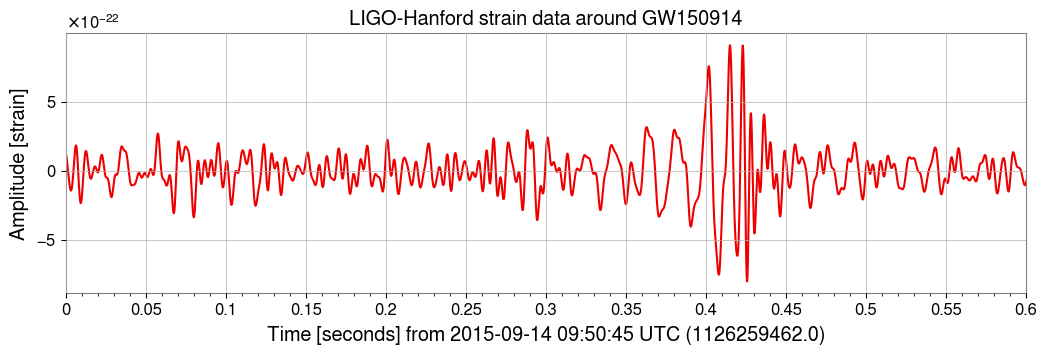

In [11]:
from gwpy.signal import filter_design

bp = filter_design.bandpass(50, 250, hdata.sample_rate)
notches = [
    filter_design.notch(line, hdata.sample_rate) for line in (60, 120, 180)
]
zpk = filter_design.concatenate_zpks(bp, *notches)
hfilt = hdata.filter(zpk, filtfilt=True)
hdata = hdata.crop(*hdata.span.contract(1))
hfilt = hfilt.crop(*hfilt.span.contract(1))
plot = hfilt.plot(color="gwpy:ligo-hanford")
ax = plot.gca()
ax.set_title("LIGO-Hanford strain data around GW150914")
ax.set_ylabel("Amplitude [strain]")
ax.set_xlim(1126259462, 1126259462.6)
ax.set_xscale("seconds", epoch=1126259462)

In [28]:
from pywavelet.types import TimeSeries

h = TimeSeries(hfilt.value, time=hfilt.times.value)
print(h)

TimeSeries(n=122,880, trange=[13035.41, 13035.41] day, T=30.00 s, fs=4096.00 Hz)


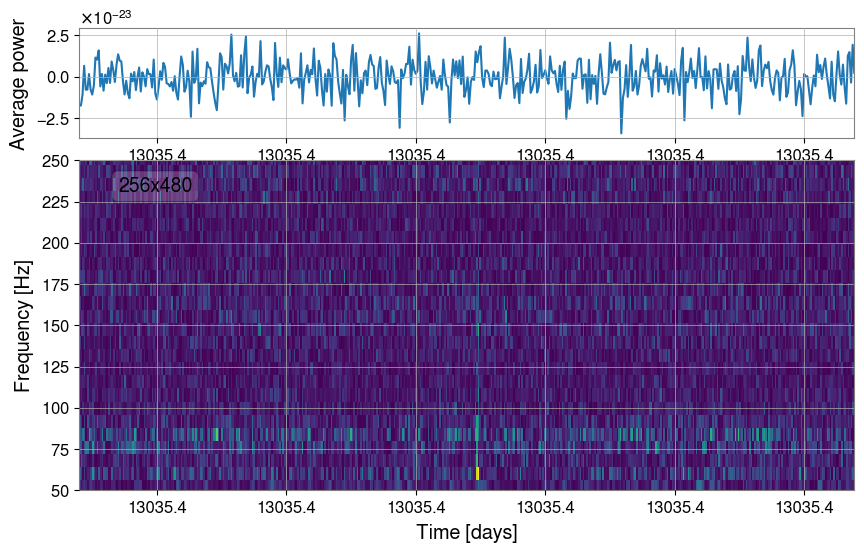

In [41]:
from matplotlib import gridspec
from matplotlib import pyplot as plt

gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3], hspace=0.1)
fig = plt.figure(figsize=(10, 6))
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1], sharex=ax0)

wavelet = h.to_wavelet(Nf=256)
wavelet.plot(freq_range=(50, 250), absolute=True, ax=ax1, show_colorbar=False)

# comute average power in each time bin
power = wavelet.data.mean(axis=0)
ax0.plot(wavelet.time, power, color="C0")
ax0.set_ylabel("Average power");